## Imports

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading The Dataset

In [3]:
ds3 = pd.read_csv('dataset3.csv')
ds3

,COUNTY,HOSPITAL,LINKS TO COMMENT LETTERS,ESOPHAGEAL RESECTION (Risk-Adjusted Mortality Rate),ESOPHAGEAL RESECTION (# of Deaths),ESOPHAGEAL RESECTION (# of Cases),ESOPHAGEAL RESECTION (Outlier Ratings),PANCREATIC RESECTION (Risk-Adjusted Mortality Rate),PANCREATIC RESECTION (# of Deaths),PANCREATIC RESECTION (# of Cases),...,PNEUMONIA (# of Cases),PNEUMONIA (Outlier Ratings),PCI (Risk-Adjusted Mortality Rate),PCI (# of Deaths),PCI (# of Cases),PCI (Outlier Ratings),CAROTID ENDARTERECTOMY (Risk-Adjusted Mortality Rate),CAROTID ENDARTERECTOMY (# of Deaths),CAROTID ENDARTERECTOMY (# of Cases),CAROTID ENDARTERECTOMY (Outlier Ratings)
0,Alameda,Alameda County Medical Center - Highland Campus,NaN,.,.,.,NaN,.,.,.,...,212,NaN,.,.,.,NaN,0,0,3,NaN
1,Alameda,Alameda Hospital,NaN,.,.,.,NaN,.,.,.,...,150,NaN,.,.,.,NaN,0,0,3,NaN
2,Alameda,Alta Bates Summit Medical Center - Alta Bates ...,NaN,.,.,.,NaN,.,.,.,...,245,NaN,2.6,5,95,NaN,6.9,1,13,NaN
3,Alameda,Alta Bates Summit Medical Center - Summit Camp...,NaN,0,0,3,NaN,0,0,3,...,371,NaN,2.9,19,792,NaN,7.2,1,21,NaN
4,Alameda,Eden Medical Center,NaN,.,.,.,NaN,.,.,.,...,195,NaN,.,.,.,NaN,0,0,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Ventura,Thousand Oaks Surgical Hospital,NaN,.,.,.,NaN,.,.,.,...,.,NaN,.,.,.,NaN,.,.,.,NaN
327,Ventura,Ventura County Medical Center,NaN,.,.,.,NaN,.,.,.,...,146,NaN,.,.,.,NaN,.,.,.,NaN
328,Yolo,Sutter Davis Hospital,NaN,.,.,.,NaN,.,.,.,...,97,NaN,.,.,.,NaN,.,.,.,NaN
329,Yolo,Woodland Memorial Hospital,NaN,.,.,.,NaN,.,.,.,...,108,NaN,.,.,.,NaN,0,0,18,NaN


## Split numerical and categorical data

In [4]:
# Corrected lists of numerical and categorical columns
numerical_cols = [
	'ESOPHAGEAL RESECTION (Risk-Adjusted Mortality Rate)',
	'ESOPHAGEAL RESECTION (# of Deaths)',
	'ESOPHAGEAL RESECTION (# of Cases)',
	'PANCREATIC RESECTION (Risk-Adjusted Mortality Rate)',
	'PANCREATIC RESECTION (# of Deaths)',
	'PANCREATIC RESECTION (# of Cases)',
	'AAA REPAIR (Risk-Adjusted Mortality Rate)',
	'AAA REPAIR (# of Deaths)',
	'AAA REPAIR (# of Cases)',
	'CRANIOTOMY (Risk-Adjusted Mortality Rate)',
	'CRANIOTOMY (# of Deaths)',
	'CRANIOTOMY (# of Cases)',
	'ACUTE MYOCARDIAL INFARCTION (Risk-Adjusted Mortality Rate)',
	'ACUTE MYOCARDIAL INFARCTION (# of Deaths)',
	'ACUTE MYOCARDIAL INFARCTION (# of Cases)',
	'HEART FAILURE (Risk-Adjusted Mortality Rate)',
	'HEART FAILURE (# of Deaths)',
	'HEART FAILURE (# of Cases)',
	'ACUTE STROKE (Risk-Adjusted Mortality Rate)',
	'ACUTE STROKE (# of Deaths)',
	'ACUTE STROKE (# of Cases)',
	'GI HEMORRHAGE (Risk-Adjusted Mortality Rate)',
	'GI HEMORRHAGE (# of Deaths)',
	'GI HEMORRHAGE (# of Cases)',
	'HIP FRACTURE (Risk-Adjusted Mortality Rate)',
	'HIP FRACTURE (# of Deaths)',
	'HIP FRACTURE (# of Cases)',
	'PNEUMONIA (Risk-Adjusted Mortality Rate)',
	'PNEUMONIA (# of Deaths)',
	'PNEUMONIA (# of Cases)',
	'PCI (Risk-Adjusted Mortality Rate)',
	'PCI (# of Deaths)',
	'PCI (# of Cases)',
	'CAROTID ENDARTERECTOMY (Risk-Adjusted Mortality Rate)',
	'CAROTID ENDARTERECTOMY (# of Deaths)',
	'CAROTID ENDARTERECTOMY (# of Cases)'
]

categorical_cols = [
	'ESOPHAGEAL RESECTION (Outlier Ratings)',
	'PANCREATIC RESECTION (Outlier Ratings)',
	'AAA REPAIR (Outlier Ratings)',
	'CRANIOTOMY (Outlier Ratings)',
	'ACUTE MYOCARDIAL INFARCTION (Outlier Ratings)',
	'HEART FAILURE (Outlier Ratings)',
	'ACUTE STROKE (Outlier Ratings)',
	'GI HEMORRHAGE (Outlier Ratings)',
	'HIP FRACTURE (Outlier Ratings)',
	'PNEUMONIA (Outlier Ratings)',
	'PCI (Outlier Ratings)',
	'CAROTID ENDARTERECTOMY (Outlier Ratings)'
]



In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [56]:
# Check for non-numeric values and handle them
# For example, replacing '.' with NaN and then imputing missing values
numerical_data = ds3[numerical_cols].replace('.', pd.NA).astype(float) # Convert to float
categorical_data = ds3[categorical_cols]

# Handle missing values, if any, in numerical_data
# For example, replacing NaN with the mean of the column
numerical_data = numerical_data.fillna(numerical_data.mean())

# Combine numerical and categorical data for the pipeline
processed_data = pd.concat([numerical_data, categorical_data], axis=1)

# Preprocessing steps
preprocessor = ColumnTransformer(
	transformers=[
		('num', StandardScaler(), numerical_cols),
		('cat', OneHotEncoder(), categorical_cols)
	])

# K-Means model
kmeans = KMeans(n_clusters=3, init="k-means++")  # Example: 3 clusters

# Creating a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('clusterer', kmeans)])

# Fit the model
pipeline.fit(processed_data)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ESOPHAGEAL RESECTION '
                                                   '(Risk-Adjusted Mortality '
                                                   'Rate)',
                                                   'ESOPHAGEAL RESECTION (# of '
                                                   'Deaths)',
                                                   'ESOPHAGEAL RESECTION (# of '
                                                   'Cases)',
                                                   'PANCREATIC RESECTION '
                                                   '(Risk-Adjusted Mortality '
                                                   'Rate)',
                                                   'PANCREATIC RESECTION (# of '
                                                   'Deaths)',
                                                   'PANCREATIC RESECTION (# of '
                                                   'Cases)',
                                                   'AAA REPAIR (Risk...
                                                   'Ratings)',
                                                   'CRANIOTOMY (Outlier '
                                                   'Ratings)',
                                                   'ACUTE MYOCARDIAL '
                                                   'INFARCTION (Outlier '
                                                   'Ratings)',
                                                   'HEART FAILURE (Outlier '
                                                   'Ratings)',
                                                   'ACUTE STROKE (Outlier '
                                                   'Ratings)',
                                                   'GI HEMORRHAGE (Outlier '
                                                   'Ratings)',
                                                   'HIP FRACTURE (Outlier '
                                                   'Ratings)',
                                                   'PNEUMONIA (Outlier '
                                                   'Ratings)',
                                                   'PCI (Outlier Ratings)',
                                                   'CAROTID ENDARTERECTOMY '
                                                   '(Outlier Ratings)'])])),
                ('clusterer', KMeans(n_clusters=3))])

In [57]:
# Copy ds3 to a new DataFrame for analysis
ds3_analysis = ds3.copy()

# Add cluster labels
ds3_analysis['Cluster'] = pipeline['clusterer'].labels_

# After fitting the model
n_iter = pipeline['clusterer'].n_iter_
inertia = pipeline['clusterer'].inertia_

print(f"Number of Iterations: {n_iter}")
print(f"Inertia (SSE): {inertia}")




Number of Iterations: 16
Inertia (SSE): 9489.566649330443


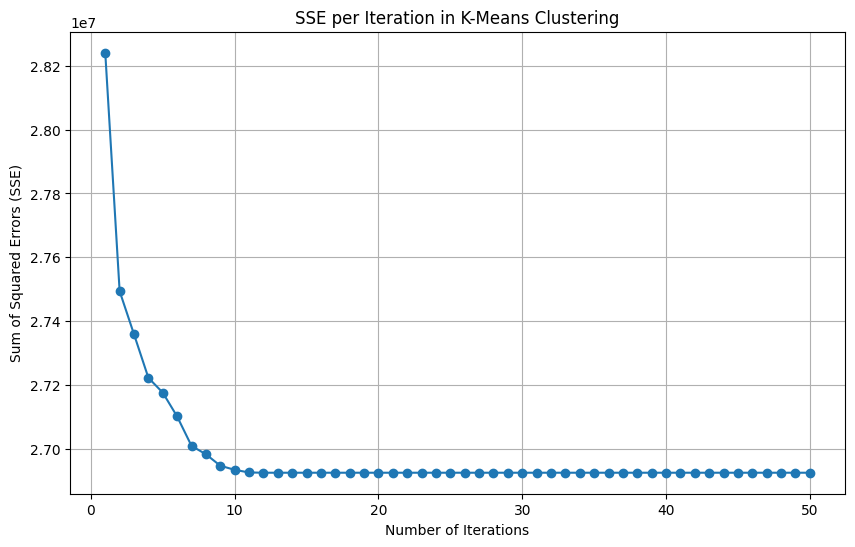

In [63]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Maximum number of iterations to track
max_iterations = 50  # Adjust based on how many iterations you want to track

# List to store the SSE for each iteration
sse_per_iteration = []

for i in range(1, max_iterations + 1):
	kmeans = KMeans(n_clusters=3, init="k-means++", n_init=1, max_iter=i, random_state=0)
	kmeans.fit(ds3_analysis[numerical_cols])
	sse_per_iteration.append(kmeans.inertia_)

# Plotting the SSE per iteration
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_iterations + 1), sse_per_iteration, marker='o')
plt.title('SSE per Iteration in K-Means Clustering')
plt.xlabel('Number of Iterations')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

In [45]:
ds3_analysis[ds3_analysis['Cluster'] == 0]


,COUNTY,HOSPITAL,LINKS TO COMMENT LETTERS,ESOPHAGEAL RESECTION (Risk-Adjusted Mortality Rate),ESOPHAGEAL RESECTION (# of Deaths),ESOPHAGEAL RESECTION (# of Cases),ESOPHAGEAL RESECTION (Outlier Ratings),PANCREATIC RESECTION (Risk-Adjusted Mortality Rate),PANCREATIC RESECTION (# of Deaths),PANCREATIC RESECTION (# of Cases),...,PNEUMONIA (Outlier Ratings),PCI (Risk-Adjusted Mortality Rate),PCI (# of Deaths),PCI (# of Cases),PCI (Outlier Ratings),CAROTID ENDARTERECTOMY (Risk-Adjusted Mortality Rate),CAROTID ENDARTERECTOMY (# of Deaths),CAROTID ENDARTERECTOMY (# of Cases),CAROTID ENDARTERECTOMY (Outlier Ratings),Cluster
2,Alameda,Alta Bates Summit Medical Center - Alta Bates ...,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,NaN,2.600000,5.000000,95.000000,NaN,6.90000,1.000000,13.000000,NaN,0
3,Alameda,Alta Bates Summit Medical Center - Summit Camp...,NaN,0.000,0.00,3.000,NaN,0.000000,0.000,3.0000,...,NaN,2.900000,19.000000,792.000000,NaN,7.20000,1.000000,21.000000,NaN,0
4,Alameda,Eden Medical Center,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,NaN,2.021678,6.748252,335.706294,NaN,0.00000,0.000000,7.000000,NaN,0
5,Alameda,Kaiser Foundation Hospital - Hayward,NaN,3.025,0.25,8.325,NaN,12.200000,1.000,10.0000,...,NaN,0.000000,0.000000,6.000000,NaN,0.00000,0.000000,38.000000,NaN,0
6,Alameda,Kaiser Foundation Hospital - Oakland Campus,NaN,3.025,0.25,8.325,NaN,0.000000,0.000,10.0000,...,NaN,2.021678,6.748252,335.706294,NaN,0.00000,0.000000,32.000000,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Ventura,Community Memorial Hospital - San Buenaventura,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,NaN,1.500000,4.000000,361.000000,NaN,0.00000,0.000000,48.000000,NaN,0
321,Ventura,Los Robles Hospital and Medical Center,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,NaN,1.600000,7.000000,518.000000,NaN,0.00000,0.000000,24.000000,NaN,0
324,Ventura,Saint John�s Regional Medical Center,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,NaN,2.100000,13.000000,287.000000,NaN,0.00000,0.000000,35.000000,NaN,0
326,Ventura,Thousand Oaks Surgical Hospital,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,NaN,2.021678,6.748252,335.706294,NaN,0.52402,0.161765,33.965686,NaN,0


In [33]:
ds3_analysis[ds3_analysis['Cluster'] == 1]


,COUNTY,HOSPITAL,LINKS TO COMMENT LETTERS,ESOPHAGEAL RESECTION (Risk-Adjusted Mortality Rate),ESOPHAGEAL RESECTION (# of Deaths),ESOPHAGEAL RESECTION (# of Cases),ESOPHAGEAL RESECTION (Outlier Ratings),PANCREATIC RESECTION (Risk-Adjusted Mortality Rate),PANCREATIC RESECTION (# of Deaths),PANCREATIC RESECTION (# of Cases),...,PNEUMONIA (Outlier Ratings),PCI (Risk-Adjusted Mortality Rate),PCI (# of Deaths),PCI (# of Cases),PCI (Outlier Ratings),CAROTID ENDARTERECTOMY (Risk-Adjusted Mortality Rate),CAROTID ENDARTERECTOMY (# of Deaths),CAROTID ENDARTERECTOMY (# of Cases),CAROTID ENDARTERECTOMY (Outlier Ratings),Cluster
3,Alameda,Alta Bates Summit Medical Center - Summit Camp...,NaN,0.000,0.00,3.000,NaN,0.000000,0.000,3.0000,...,NaN,2.900000,19.000000,792.000000,NaN,7.2,1.0,21.0,NaN,1
5,Alameda,Kaiser Foundation Hospital - Hayward,NaN,3.025,0.25,8.325,NaN,12.200000,1.000,10.0000,...,NaN,0.000000,0.000000,6.000000,NaN,0.0,0.0,38.0,NaN,1
6,Alameda,Kaiser Foundation Hospital - Oakland Campus,NaN,3.025,0.25,8.325,NaN,0.000000,0.000,10.0000,...,NaN,2.021678,6.748252,335.706294,NaN,0.0,0.0,32.0,NaN,1
10,Alameda,Washington Hospital - Fremont,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,Worse,2.300000,11.000000,357.000000,NaN,0.0,0.0,16.0,NaN,1
13,Butte,Enloe Medical Center - Esplanade Campus,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,NaN,2.000000,7.000000,394.000000,NaN,0.0,0.0,85.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,Stanislaus,Memorial Hospital Medical Center - Modesto,NaN,3.025,0.25,8.325,NaN,22.000000,2.000,6.0000,...,NaN,2.700000,20.000000,593.000000,NaN,0.5,1.0,153.0,NaN,1
316,Tulare,Kaweah Delta Medical Center,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,NaN,2.100000,17.000000,1289.000000,NaN,2.1,1.0,87.0,NaN,1
321,Ventura,Los Robles Hospital and Medical Center,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,NaN,1.600000,7.000000,518.000000,NaN,0.0,0.0,24.0,NaN,1
324,Ventura,Saint John�s Regional Medical Center,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,NaN,2.100000,13.000000,287.000000,NaN,0.0,0.0,35.0,NaN,1


In [34]:
ds3_analysis[ds3_analysis['Cluster'] == 2]

,COUNTY,HOSPITAL,LINKS TO COMMENT LETTERS,ESOPHAGEAL RESECTION (Risk-Adjusted Mortality Rate),ESOPHAGEAL RESECTION (# of Deaths),ESOPHAGEAL RESECTION (# of Cases),ESOPHAGEAL RESECTION (Outlier Ratings),PANCREATIC RESECTION (Risk-Adjusted Mortality Rate),PANCREATIC RESECTION (# of Deaths),PANCREATIC RESECTION (# of Cases),...,PNEUMONIA (Outlier Ratings),PCI (Risk-Adjusted Mortality Rate),PCI (# of Deaths),PCI (# of Cases),PCI (Outlier Ratings),CAROTID ENDARTERECTOMY (Risk-Adjusted Mortality Rate),CAROTID ENDARTERECTOMY (# of Deaths),CAROTID ENDARTERECTOMY (# of Cases),CAROTID ENDARTERECTOMY (Outlier Ratings),Cluster
0,Alameda,Alameda County Medical Center - Highland Campus,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,NaN,2.021678,6.748252,335.706294,NaN,0.00000,0.000000,3.000000,NaN,2
1,Alameda,Alameda Hospital,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,NaN,2.021678,6.748252,335.706294,NaN,0.00000,0.000000,3.000000,NaN,2
2,Alameda,Alta Bates Summit Medical Center - Alta Bates ...,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,NaN,2.600000,5.000000,95.000000,NaN,6.90000,1.000000,13.000000,NaN,2
4,Alameda,Eden Medical Center,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,NaN,2.021678,6.748252,335.706294,NaN,0.00000,0.000000,7.000000,NaN,2
7,Alameda,Saint Rose Hospital,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,NaN,3.400000,7.000000,113.000000,NaN,0.00000,0.000000,3.000000,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Ventura,Simi Valley Hospital and Healthcare Services -...,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,NaN,2.021678,6.748252,335.706294,NaN,0.00000,0.000000,6.000000,NaN,2
326,Ventura,Thousand Oaks Surgical Hospital,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,NaN,2.021678,6.748252,335.706294,NaN,0.52402,0.161765,33.965686,NaN,2
327,Ventura,Ventura County Medical Center,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,NaN,2.021678,6.748252,335.706294,NaN,0.52402,0.161765,33.965686,NaN,2
328,Yolo,Sutter Davis Hospital,NaN,3.025,0.25,8.325,NaN,5.678125,0.375,10.3125,...,NaN,2.021678,6.748252,335.706294,NaN,0.52402,0.161765,33.965686,NaN,2


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to the preprocessed data (not the original ds3)
reduced_data = pca.fit_transform(pipeline['preprocessor'].transform(ds3))

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=ds3_analysis['Cluster'])
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Cluster Visualization')
plt.show()